In [1]:
import Pkg; Pkg.activate(joinpath(@__DIR__, "..")); Pkg.instantiate()

  Activating project at `~/gits/DisjunctiveToQUBO.jl`


In [2]:
using JuMP
using DisjunctiveProgramming
using ToQUBO
using DisjunctiveToQUBO

$$
\begin{array}{rl}
\displaystyle \max_{x, y} & x - y \\
            \textrm{s.t.} & Y_1, Y_2 \in \{ \textrm{True}, \textrm{False} \} \\
                        ~ & \left[
                                \begin{array}{c}
                                    Y_1 \\
                                    1 \leq x \leq 2 \\
                                    1 \leq y \leq 2
                                \end{array}
                            \right] \bigvee
                            \left[
                                \begin{array}{c}
                                    Y_2 \\
                                    -2 \leq x \leq -1 \\
                                    -2 \leq y \leq -1
                                \end{array}
                            \right]
\end{array}
$$

In [35]:
function build_model()
    model = GDPModel()

    @variable(model, x)
    @variable(model, y)

    @variable(model, Y[1:2], Logical)

    @disjunction(model, Y)

    @constraint(model, 1 .≤ [x, y] .≤ 2, Disjunct(Y[1]))
    @constraint(model, -2 .≤ [x, y] .≤ -1, Disjunct(Y[2]))

    return model
end

build_model (generic function with 1 method)

In [5]:
using Plots

# Make plots look professional
Plots.default(;
    fontfamily = "Computer Modern",
    plot_titlefontsize  = 16,
    titlefontsize       = 14,
    guidefontsize       = 12,
    legendfontsize      = 10,
    tickfontsize        = 10,
)

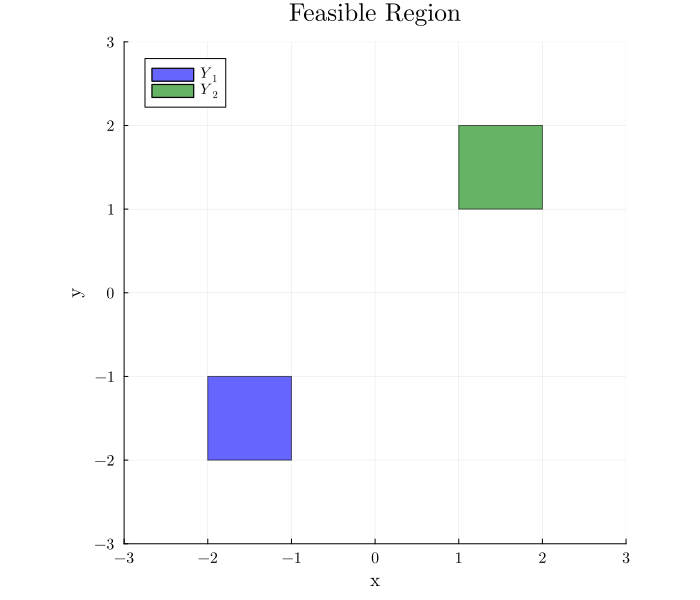

In [36]:
function feasible_region()
    rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

    plt = plot(;
        size         = (700, 600),
        plot_title   = "Feasible Region",
        xlabel       = "x",
        ylabel       = "y",
        xlims        = (-3, 3),
        ylims        = (-3, 3),
        aspect_ratio = :equal,
    )

    plot!(
        plt,
        rectangle(1, 1, -2, -2);
        label = raw"$ Y_1 $",
        color = :blue,
        opacity = 0.6,
    )

    plot!(
        plt,
        rectangle(1, 1, 1, 1),
        label = raw"$ Y_2 $",
        color = :green,
        opacity = 0.6,
    )


    plt
end

feasible_region()

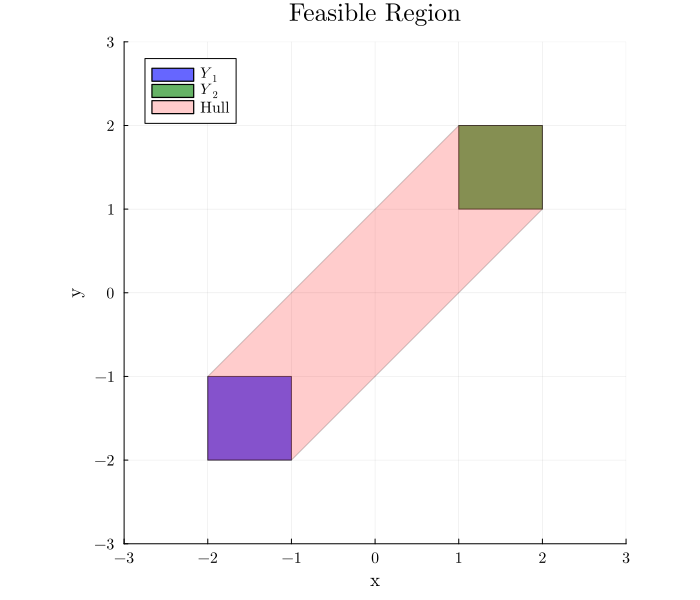

In [38]:
function hull_region()
    plt = feasible_region()

    plot!(
        plt,
        Shape(
            [-2, -1, 2, 2, 1, -2, -2],
            [-2, -2, 1, 2, 2, -1, -2],
        );
        label   = "Hull",
        color   = :red,
        opacity = 0.2,
    )

    plt
end

hull_region()